# Exploring the "2020 Ford GoBike System Data"
## by Tanmay Jain

## Investigation Overview

> This exploration will cover exploring the dataset and finding trends in it. We will see how number of rides vary and answer questions like "What are the most busy times of bike rides?", "What is the most common Start Point of rides?", etc.

## Dataset Overview

> The dataset here includes data for all the rides made in February 2020. It contains data for more than 400k rides with 14 features each, such as start time of ride, duration of ride, user type, rental access method.

In [1]:
#Loading all the libraries
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Reading the dataset
df=pd.read_csv('202002-baywheels-tripdata.csv')

In [4]:
#Preprocessing the data in order to use it more easily
df.start_time=pd.to_datetime(df.start_time)
df['start_hour']=df.start_time.dt.hour
df['start_day']=df.start_time.dt.day
df['duration_min']=df.duration_sec/60
df['start_day']=df.start_time.dt.strftime('%a')
df['start_month']=df.start_time.dt.strftime('%b')

## Most Common Start Point of Ride

> It can be seen that the most common pick-up station is `Market St at 10th St` with around 3100 pickups followed by `San Francisco Caltrain` with around 2700 pickups.

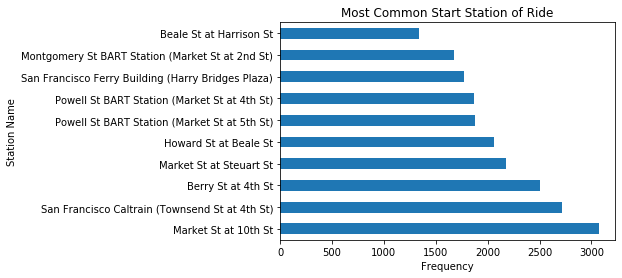

In [10]:
df.start_station_name.value_counts()[:10].plot(kind='barh')
plt.title('Most Common Start Station of Ride')
plt.xlabel('Frequency')
plt.ylabel('Station Name')
plt.show()

## Bike Trip Hourly Distribution

> This graph displays the bike trip count in hourly distribution for both types of customers, casual and subscribed. We can see that for both types of customers, the peak timings for rides are the same, i.e. 800 hours and 1700 hours.

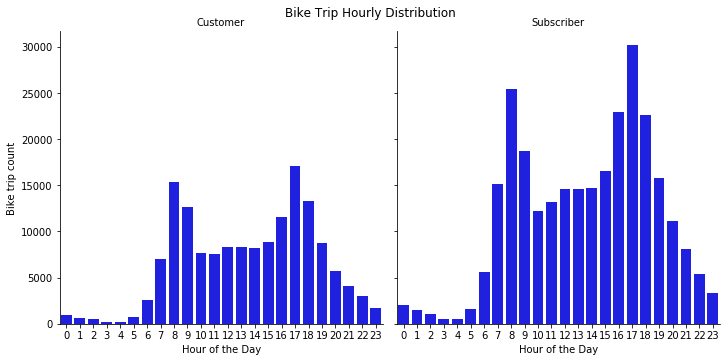

In [6]:
g = sb.catplot(data = df, x = "start_hour", col = "user_type", height = 5, kind = "count", color = 'b')
g.fig.suptitle("Bike Trip Hourly Distribution", y = 1)
g.set_axis_labels("Hour of the Day", "Bike trip count")
g.set_titles("{col_name}")

## Hourly Usage by Weekday for Customers and Subscribers
> This heatmap displays how the number of rides vary by timings every day for both types of users, casual and subscribed. The darker portion shows more number of rides. This can be seen that just like we know, most of the rides are taken around 5pm and 8am on weekdays for both types of users. 


In [7]:
def plotHeatMap(x):
    df2 = df[df.user_type == x].groupby(["start_hour", "start_day"]).bike_id.size().reset_index()
    df2 = df2.pivot("start_hour", "start_day",'bike_id')
    sb.heatmap(df2, cmap="Blues")
    plt.title(x, y=1)
    plt.xlabel('Weekday')
    plt.ylabel('Start Time (hour)')

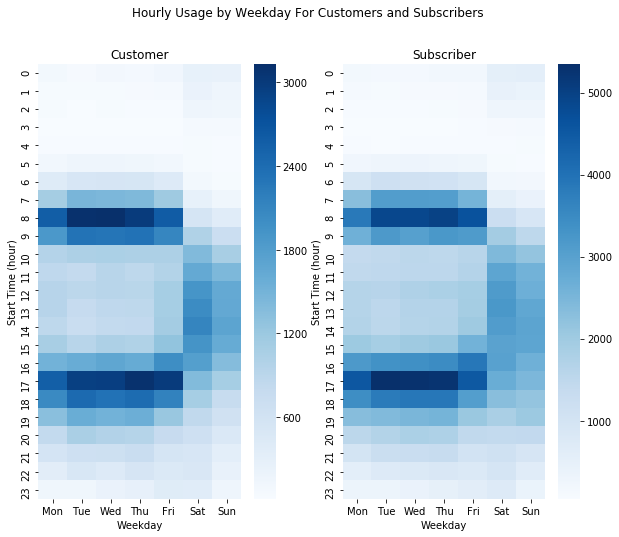

In [8]:
df.start_day=pd.Categorical(df.start_day, categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)
plt.figure(figsize=(10,8))
plt.suptitle('Hourly Usage by Weekday For Customers and Subscribers')
plt.subplot(1, 2, 1)
plotHeatMap('Customer')
plt.subplot(1, 2, 2)
plotHeatMap('Subscriber')

## Trip Duration for every day of a Week for both User Type
>This plot here shows the trip duration varying by the days of a week for both types of users. This can be seen that most of the long duration rides were made by casual customers instead of the subscribed ones.

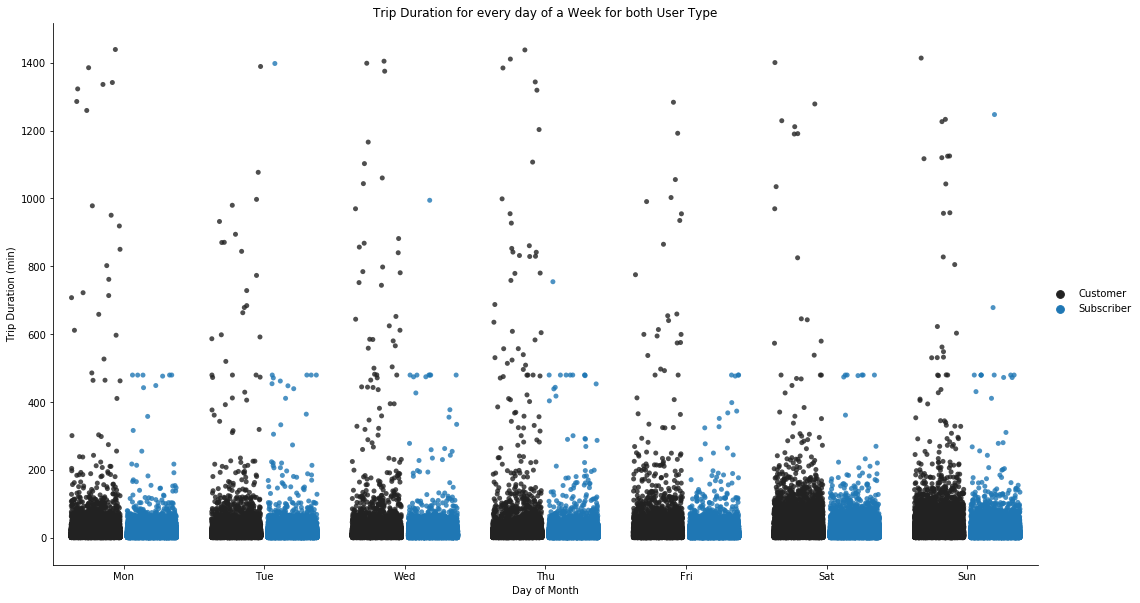

In [9]:
g = sb.FacetGrid(data = df, height = 8.27, aspect = 14.70/8.27)
g.map(sb.stripplot, "start_day", "duration_min", "user_type", jitter = 0.35, dodge = True, alpha = 0.8)
g.add_legend()
plt.title("Trip Duration for every day of a Week for both User Type")
plt.xlabel("Day of Month")
plt.ylabel("Trip Duration (min)")